
# CS515 - Deep Learning - 2023
## Homework 1 - Basic FeedForward Network
100 pts

## Task: 
Get hands-on experience with training a shallow neural network (1- or 2-hidden layers only) on a small but adjustable problem.

## Software: 

You may find the necessary function references here: 

https://pytorch.org/docs/stable/torch.html

## Mount your files (not needed for this homework)

In [ ]:
#Add in the future if you need to transfer data

#from google.colab import drive
#drive.mount('/content/gdrive')

## Include the necessary libraries

In [ ]:
#import pytorch
import torch
import torch.optim as optim
#for plotting the learning curve
import matplotlib.pyplot as plt
import random
import numpy as np


## Hyperparameters

In [ ]:
f  = 2       # target function frequency
max_epochs = 200_000 # maximum number of epochs
hiddensize = 100    # number of hidden layers for your network
lr =  1e-3        # learning rate
momentum = 0.9        # momentum parameter for SGD optimizer
num_hidden_layers = 2       # number of hidden layers

## Set a random seed for reproducibility

In [ ]:
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

## Generate and plot the data

tensor([[37.4540],
        [95.0714],
        [73.1994],
        [59.8658],
        [15.6019]])
tensor([[-1.0000],
        [-0.5854],
        [ 0.2289],
        [ 0.9445],
        [ 0.9254]])


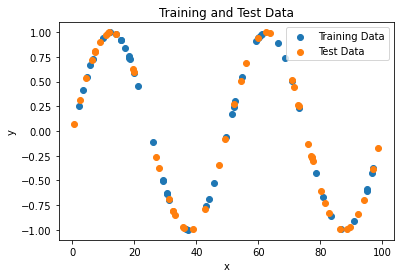

In [ ]:
def return_data(num_samples):
    '''
    Function generates num_samples many instances of (x, sin(2 * pi * f * x)) pairs
    '''
    x = torch.Tensor(np.random.rand(num_samples, 1) * 100)
    y = np.sin(2 * 3.14 * f / 100 * x)
    return x, y

# Set the number of instances
num_train = 50
num_test = 50
# Generate train and test data
x_train, y_train = return_data(num_train)
x_test, y_test = return_data(num_test)
x_val, y_val = return_data(num_val) 
# Show first 5 instances
print(x_train[:5])
print(y_train[:5])
# Plot the training data
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data')
# Plot the test data
plt.scatter(x_test.numpy(), y_test.numpy(), label='Test Data')
plt.title("Training and Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## Design a neural network

In [ ]:
# Define the neural network architecture
class Net(torch.nn.Module):
    def __init__(self, hidden_dimension, num_hidden_layers):
        super(Net, self).__init__()
        self.input = torch.nn.Sequential(torch.nn.Linear(1, hidden_dimension),torch.nn.ReLU())
        # input layer
        # B x 1 -> B x hidden_dimension (with a ReLU nonlinearity at the end)
        self.input = torch.nn.Sequential(
            torch.nn.Linear(1, hidden_dimension),
            torch.nn.ReLU()) # add a sequential layer that contains a Linear layer and ReLU respectively 
        # B x hidden_dimension -> B x hidden_dimension (with a ReLU nonlinearity at the end) repeated num_hidden_layers many times
        self.hiddens =torch.nn.ModuleList()   # add a ModuleList that contains num_hidden_layers many sequential layers each having one Linear layer and one ReLU
        for i in range(num_hidden_layers):
            self.hiddens.append(torch.nn.Sequential(
                torch.nn.Linear(hidden_dimension, hidden_dimension),
                torch.nn.ReLU()))
        # output layer
        # B x hidden_dimension -> B x 1
        self.output = torch.nn.Linear(hidden_dimension, 1) # add a Linear layer
    def forward(self, x):
        x = self.input(x)
        for hidden in self.hiddens:
            x = hidden(x)
        x = self.output(x)
        return x


## Create a network, loss function and optimizer

In [ ]:
# Create the neural network and specify the loss function and optimizer
net = Net(hidden_dimension=hiddensize, num_hidden_layers=num_hidden_layers) # create a network with hidden_dimension and num_hidden_layers
criterion = torch.nn.MSELoss() # objective to minimize
optimizer = torch.optim.Adam(net.parameters(), lr=lr) # I prefer ADAM to use

#torch.optim.SGD(net.parameters(), lr=lr, momentum=momentum) # choose and create an optimizer (SGD, SGD with momentum, or ADAM)


## Training loop (train vs val)

Epoch 10000: Loss = 0.3078831434249878

Validation loss: tensor(0.2939) 

Epoch 20000: Loss = 0.307882159948349

Validation loss: tensor(0.2933) 

Epoch 30000: Loss = 0.30788031220436096

Validation loss: tensor(0.2932) 

Epoch 40000: Loss = 0.016609862446784973

Validation loss: tensor(0.0250) 



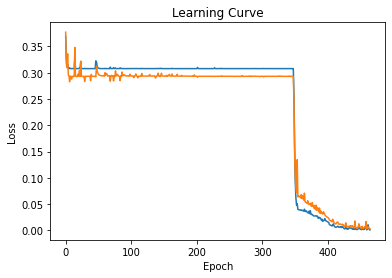

In [ ]:
# Train the neural network

# Set the desired error threshold
# acceptable for the sine function
error_threshold = 0.001
# To display the learning curve
losses = []
vallosses = []
epoch = 0
while epoch < max_epochs:
    epoch += 1     
    # Zero the gradients
    optimizer.zero_grad()
    # Forward pass
    y_pred = net(x_train)
    # Compute the loss
    loss = criterion(y_pred, y_train)
    # Backward pass
    loss.backward()
    # Update the weights
    optimizer.step()
    # Make an evaluation on the test set every 100 epochs
    if epoch % 100 == 0:
        losses.append(loss.item())
        # Test the neural network with val data
        with torch.no_grad():
          y_pred = net(x_test)
        valloss = criterion(y_pred, y_test) # loss in the test set
        vallosses.append(valloss.item())
        # Print the loss every 1000 epochs
        if epoch % 10000 == 0:
            print("Epoch {}: Loss = {}".format(epoch, loss.item()))
            print('\nValidation loss:', valloss, '\n')
        # Check if the error is below the threshold
        if loss < error_threshold or epoch > 200000:
            break
#end of the epoch loop ------------------------------------------------
# Plot the learning curve
plt.plot(losses)
plt.plot(vallosses)
plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

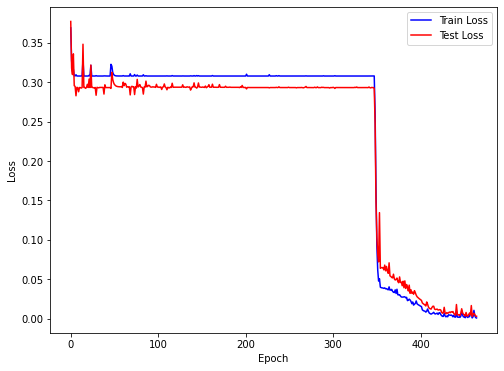

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(len(losses)), losses, label='Train Loss', color='blue')
ax.plot(range(len(vallosses)), vallosses, label='Test Loss', color='red')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

## Test the final model on train and test sets

MSE on Training Set = 0.0010856322478502989
MSE on Test Set = 0.0031587141565978527


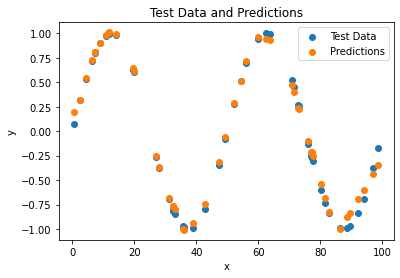

In [ ]:
# Test the neural network with train data ---------------------
with torch.no_grad():
  y_pred = net(x_train) # make a forward pass on the train data

loss = criterion(y_pred, y_train) # calculate the loss
print("MSE on Training Set = {}".format(loss.item()))
#lets see the generalization error ----------------------------
# Test the neural network with val data
with torch.no_grad():
  y_pred = net(x_test) # make a forward pass on the test data
valloss = criterion(y_pred, y_test) # calculate the loss
print("MSE on Test Set = {}".format(valloss.item()))
# Plot the test data & predictions -----------------------------
plt.scatter(x_test.numpy(), y_test.numpy(), label='Test Data')
plt.scatter(x_test.numpy(), y_pred.numpy(), label='Predictions')
plt.title("Test Data and Predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


# **Report**

1) Try to find a good network with the given parameter range for the case of f = $2$ and 200,000 epochs. (You may want to start with f = $1$ etc. until you have some experience)

2) Include a table with your configuration (network architecture as 1-25-25-1 etc), learning rate, along with train and test accuracies at 200,000 epochs. Make the best results bold.

3) Include a single figure that shows the train and test loss with respect to the number of epochs for the best arconfiguration in the table. 

4) You may state any other findings or comments at the end.

